# Preparation

Read Xy.pkl and create SQL table features_clf

In [1]:
import sys
sys.path.append('..')
from seizurecast.models.pipeline import Pipeline, Config

import numpy as np
import pandas as pd

pipeline = Pipeline(Config())
X, y = pipeline.load_xy('../data/processed/xy.pkl')

from seizurecast.features.to_sql import SQLengine

pd.DataFrame(X).assign(label=y).to_sql('features_clf', SQLengine)

In [1]:
import sys
sys.path.append('..')
from seizurecast.models.pipeline import Pipeline, Config
from seizurecast.features.to_sql import SQLengine
import pandas as pd

pipeline = Pipeline(Config())
df = pd.read_sql_table('features_clf', SQLengine)
df.head()

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,label
0,0,127.024759,69.546526,133.429728,75.579342,163.903390,86.561749,143.570808,53.153084,9.247431,8.734929,10.004829,10.836674,8.470147,12.550170,9.305133,10.220588,bckg
1,1,125.250078,67.183994,127.434964,77.281340,128.198433,66.344477,192.241251,68.802898,8.126782,8.490380,12.304529,11.684079,9.290573,9.912028,12.568496,12.651338,bckg
2,2,118.398407,103.558887,217.767268,110.263221,259.158859,94.618777,282.728322,91.828163,9.295707,10.862188,10.157833,10.618830,7.604622,7.939252,9.940667,9.570230,bckg
3,3,146.201855,73.323898,143.239389,94.063935,250.564918,82.789087,190.061045,83.145690,7.629506,8.055133,9.518876,9.070108,9.717384,10.508075,9.833249,9.648492,bckg
4,4,73.529885,51.142607,79.946733,60.309404,89.267631,45.180769,111.289420,62.992251,7.774465,8.232175,9.160430,8.521743,7.123599,9.732174,7.268022,9.429459,bckg


In [2]:
pipeline

# Model

In [1]:
import sys
sys.path.append('..')
from seizurecast.models.pipeline_sql import Pipeline_sql, Config

Collected 162 data points
Recall	 Base: 1.0	 Test: 1.0	 Train: 0.98
Precis	 Base: 0.52	 Test: 0.89	 Train: 1.0
Roc	 Base: 0.5	 Test: 0.99	 Train: 1.0
Recall	 Base: 1.0	 Test: 1.0	 Train: 1.0
Precis	 Base: 0.52	 Test: 0.89	 Train: 1.0
Roc	 Base: 0.5	 Test: 0.94	 Train: 1.0
Recall	 Base: 1.0	 Test: 1.0	 Train: 1.0
Precis	 Base: 0.52	 Test: 1.0	 Train: 1.0
Roc	 Base: 0.5	 Test: 1.0	 Train: 1.0


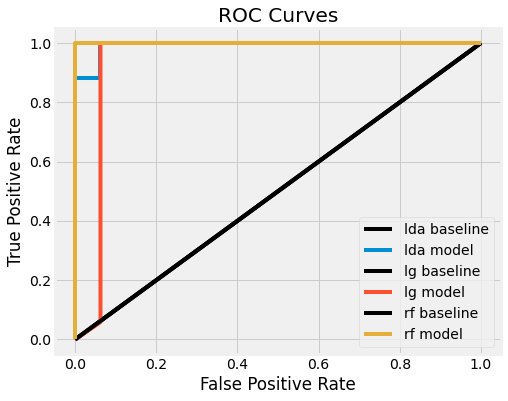

In [5]:
conf = Config()
conf.len_pos = 180
conf.len_pre = 180
conf.sec_gap = 180
psql = Pipeline_sql(conf = conf)
psql.pipe()
psql.results.plot_roc_curve()

(-1.0, 192.0)

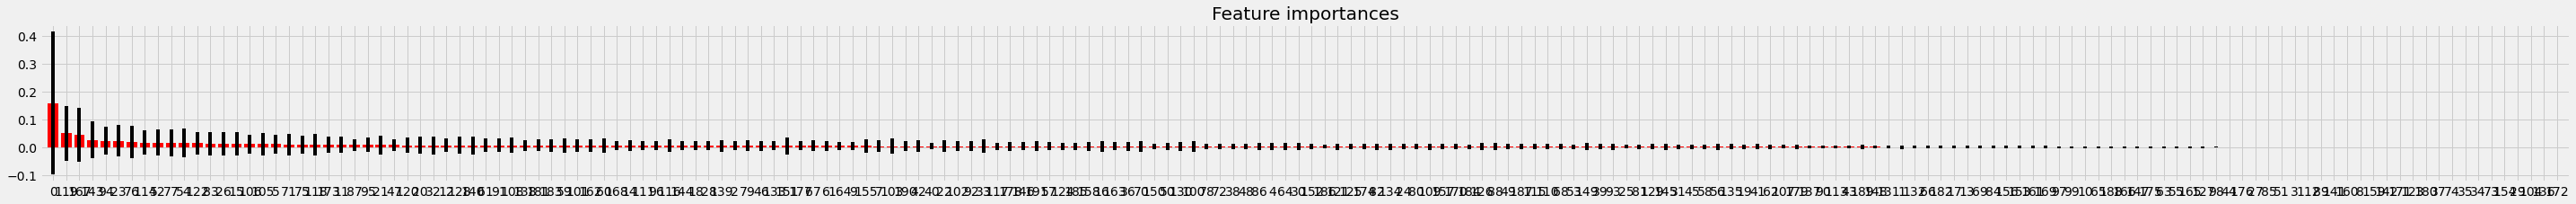

In [29]:
import matplotlib.pyplot as plt
import numpy as np

forest = psql.results.results['rf'].model
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]


# Plot the impurity-based feature importances of the forest
plt.figure(figsize=[45, 3])
plt.title("Feature importances")
plt.bar(range(len(importances)), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(len(importances)), indices)
plt.xlim([-1, len(importances)])
# plt.show()
